In [1]:
pip install transformers torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
from huggingface_hub import from_pretrained_keras
from PIL import Image

import tensorflow as tf
import numpy as np
import requests

In [3]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model = from_pretrained_keras("google/maxim-s3-deblurring-realblur-r")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.66k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/72.3M [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/6.64M [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/170k [00:00<?, ?B/s]

In [5]:
image = Image.open('/content/drive/MyDrive/test_image_1.png')

In [6]:
image = np.array(image)
image = tf.convert_to_tensor(image)
image = tf.image.resize(image, (256, 256))

In [7]:
predictions = model.predict(tf.expand_dims(image, 0))

1/1 [==============================] - 54s 54s/step


In [8]:
all_deblurred_images = []

for outer_element in predictions:
    deblurred_images = []
    for inner_element in outer_element:
        squeezed_prediction = np.squeeze(inner_element)
        squeezed_prediction = np.clip(squeezed_prediction, 0, 255).astype(np.uint8)
        deblurred_image = Image.fromarray(squeezed_prediction)
        deblurred_images.append(deblurred_image)
    all_deblurred_images.append(deblurred_images)

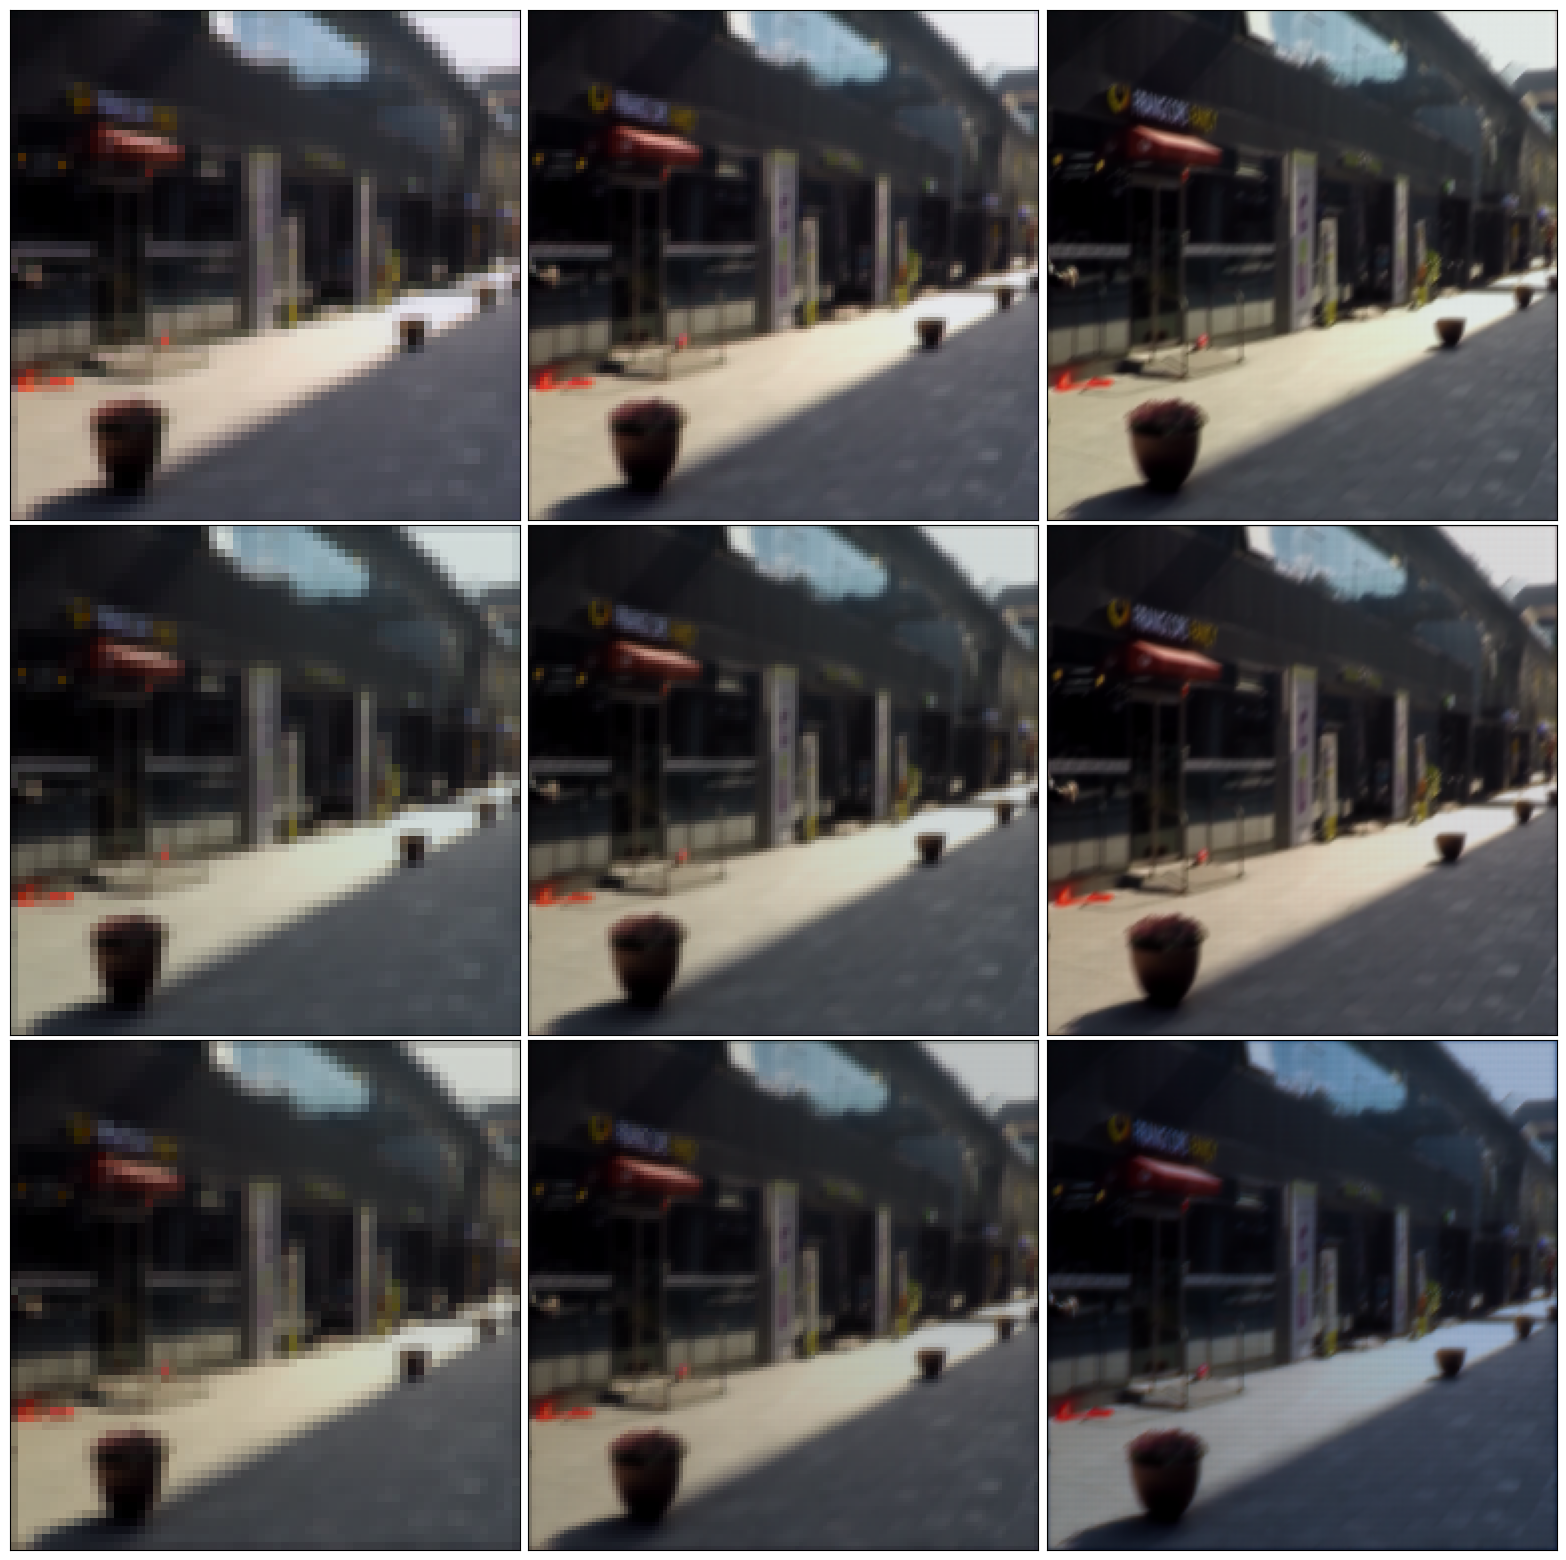

In [11]:
import matplotlib.pyplot as plt


# Get the number of outer elements and inner elements
num_outer_elements = len(all_deblurred_images)
num_inner_elements = len(all_deblurred_images[0])

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=num_outer_elements, ncols=num_inner_elements, figsize=(20, 20))

# Iterate over the nested list and display the images
for i, outer_element in enumerate(all_deblurred_images):
    for j, deblurred_image in enumerate(outer_element):
        ax = axes[i, j]
        ax.imshow(deblurred_image)
        ax.set_xticks([])
        ax.set_yticks([])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.01, hspace=0.01)

# Show the figure
plt.show()

In [ ]:
pip install transformers torch torchvision

from huggingface_hub import from_pretrained_keras
from PIL import Image

import tensorflow as tf
import numpy as np
import requests

model = from_pretrained_keras("google/maxim-s3-deblurring-gopro")

url = "https://github.com/sayakpaul/maxim-tf/raw/main/images/Deblurring/input/1fromGOPR0950.png"
image = Image.open(requests.get(url, stream=True).raw)


image = np.array(image)
image = tf.convert_to_tensor(image)
image = tf.image.resize(image, (256, 256))

predictions = model.predict(tf.expand_dims(image, 0))

SyntaxError: invalid syntax (<ipython-input-13-a4ae550706c8>, line 1)